## NFT ANALYSIS ##

### Dataset import ###

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

nft_ds = pd.read_csv('../datasets/nfts/nft_trades.csv', chunksize=100000)
nft_df = pd.concat(nft_ds)

nft_df.head()
nft_df.info()
nft_df.shape

/var/folders/z0/w05phkg900j6dsx_95__2tz80000gn/T/ipykernel_2258/2787522934.py:7: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  nft_df = pd.concat(nft_ds)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507678 entries, 0 to 507677
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              507678 non-null  object 
 1   transaction_hash  507678 non-null  object 
 2   num_items         507678 non-null  int64  
 3   seller            507678 non-null  object 
 4   buyer             507678 non-null  object 
 5   token_id          507678 non-null  object 
 6   avg_price         507678 non-null  float64
 7   currency          507678 non-null  object 
 8   usd_amount        507678 non-null  float64
 9   platform          507678 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 38.7+ MB


(507678, 10)

### Display of peaks for years and months ###

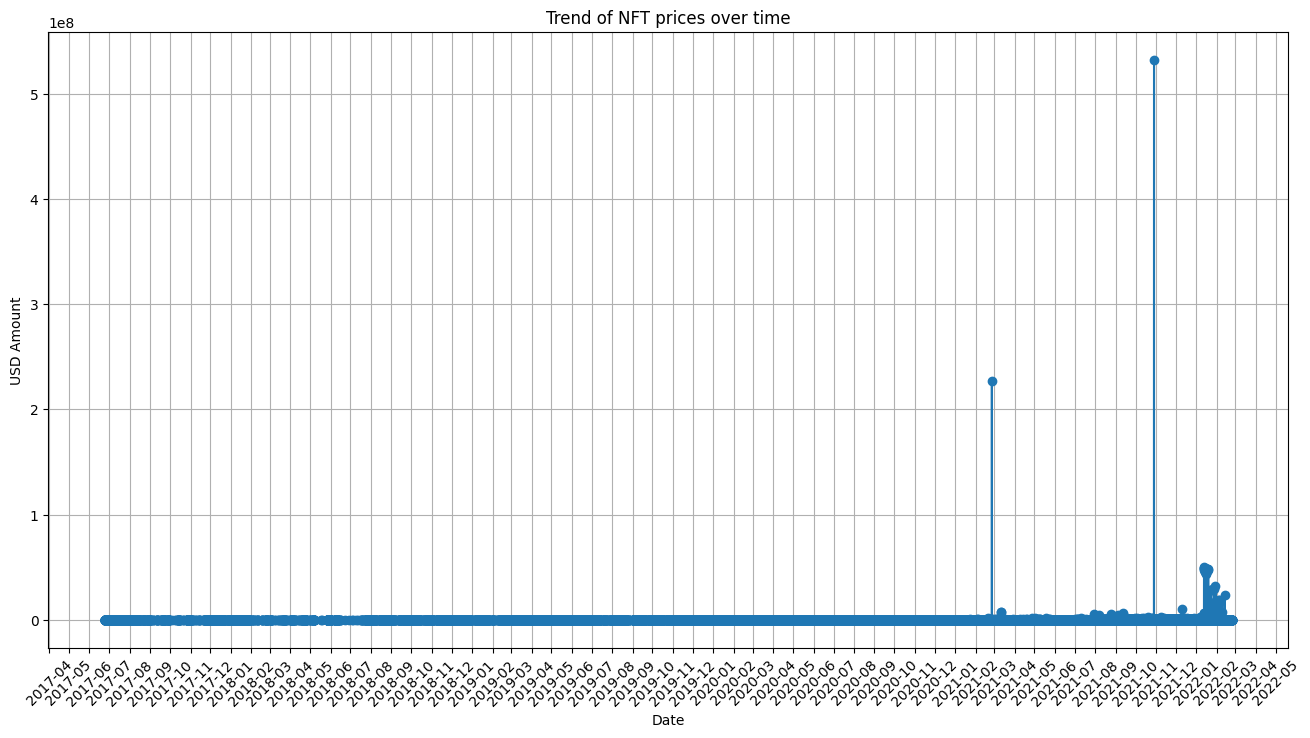

In [16]:
# Convert the 'date' column to datetime
nft_df['date'] = pd.to_datetime(nft_df['date'])

# Set 'date' as the index of the DataFrame
nft_df.set_index('date', inplace=True)

# Create the plot with larger dimensions
plt.figure(figsize=(16, 8))  # Increase the size of the figure
plt.plot(nft_df.index, nft_df['usd_amount'], marker='o', linestyle='-')

# Add a title to the plot
plt.title('Trend of NFT prices over time')

# Add labels to the axes
plt.xlabel('Date')
plt.ylabel('USD Amount')

# Format the x-axis to show the year and month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Add a grid
plt.grid(True)

# Display the plot
plt.show()

In [17]:
# Verificare le colonne del DataFrame
print(nft_df.columns)

Index(['transaction_hash', 'num_items', 'seller', 'buyer', 'token_id',
       'avg_price', 'currency', 'usd_amount', 'platform'],
      dtype='object')


### Display of peaks from December 1, 2020 ###

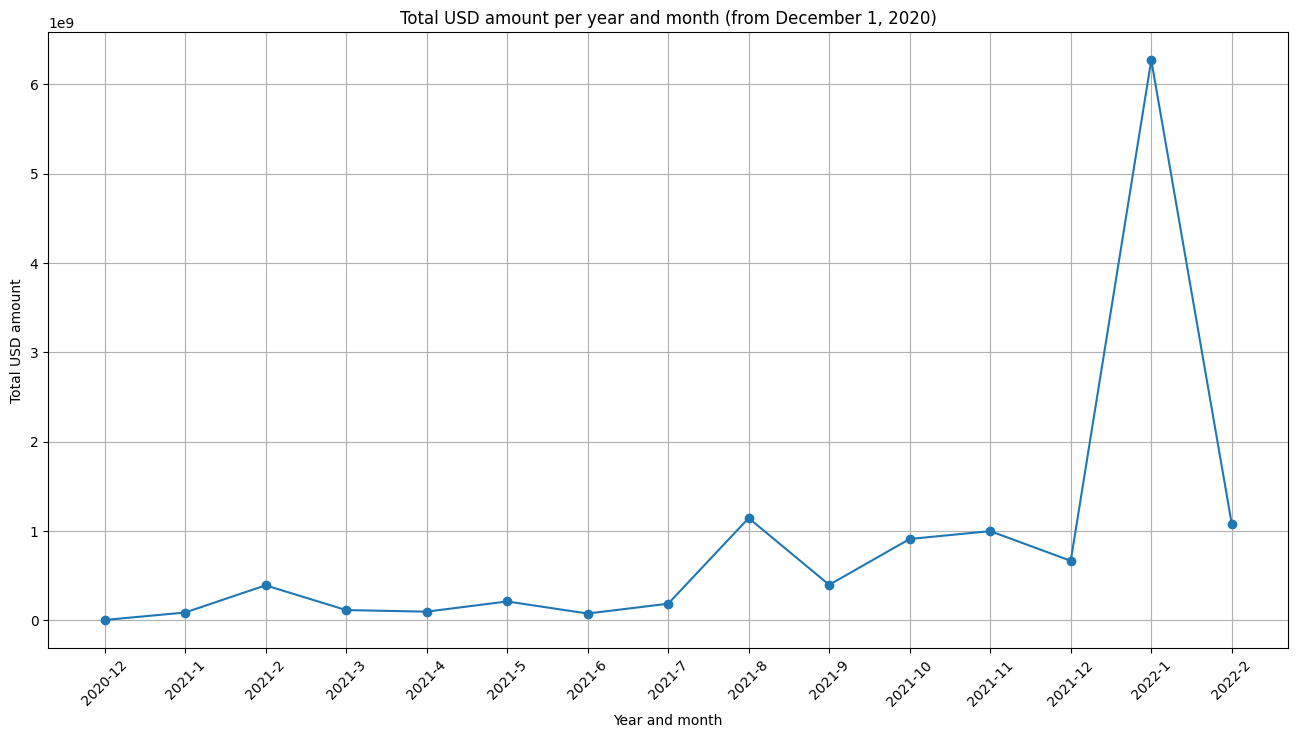

In [18]:
# Reset the index to make 'date' a standard column again
nft_df.reset_index(inplace=True)

# Convert the 'date' column to datetime
nft_df['date'] = pd.to_datetime(nft_df['date'])

# Filter the trades from December 1, 2020 to the end of the dataset
nft_df_filtered = nft_df[nft_df['date'] >= pd.Timestamp('2020-12-01')]

# Calculate the total USD amount per year and month
total_usd_per_year_month = nft_df_filtered.groupby([nft_df_filtered['date'].dt.year, nft_df_filtered['date'].dt.month])['usd_amount'].sum()

# Convert the index to a string format "Year-Month"
index_string = total_usd_per_year_month.index.map(lambda x: f"{x[0]}-{x[1]}")

# Create the plot with larger dimensions
plt.figure(figsize=(16, 8))
plt.plot(index_string, total_usd_per_year_month.values, marker='o', linestyle='-')
plt.title('Total USD amount per year and month (from December 1, 2020)')
plt.xlabel('Year and month')
plt.ylabel('Total USD amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Salvataggio dataframe per confrontare picchi dei tweet e degli nft

In [19]:
import os

# Percorso della cartella "datasets"
datasets_path = '../datasets/'

# Percorso della cartella "dataframes"
dataframes_path = '../dataframes'

# Creazione della cartella 'dataframes' se non esiste
os.makedirs(dataframes_path, exist_ok=True)

# Salvataggio del dataframe nft_df in un file CSV nella cartella 'dataframes'
nft_df_filtered.to_csv(os.path.join(dataframes_path, 'nft_df.csv'), index=False)